In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr

def abs_avg(mat):
    mat4 = mat.copy()
    t = abs(mat4[0][-len(common_adt):].copy())/(len(mat4))
    for i in range(1, len(mat4)):
        t += abs(mat4[i][-len(common_adt):].copy())/len(mat4)
    return t

In [2]:
name = "witkowski_2020"
adt = pd.read_csv("csvfiles/"+name+"_adt_scaledata.csv", index_col = 0).transpose()
rna = pd.read_csv("csvfiles/"+name+"_rna_scaledata.csv", index_col = 0).transpose()
azi = pd.read_csv("csvfiles/"+name+"_azi_scaledata.csv", index_col = 0).transpose()
ctp = pd.read_csv("csvfiles/"+name+"_ctp_scaledata.csv", index_col = 0).transpose()

In [3]:
cell_broad_labels = pd.read_csv("csvfiles/" + name + "_cell_type_l1.csv", index_col = 0)
cell_fine_labels = pd.read_csv("csvfiles/" + name + "_cell_type_l2.csv", index_col = 0)

In [4]:
for i in range(len(cell_fine_labels)):
    if cell_broad_labels['x'][i] == "B": # wang, witkowski and fournie
        cell_fine_labels['x'][i] = cell_broad_labels['x'][i]
    #elif cell_broad_labels['x'][i] == "CD4 T": # Wang 
    #    cell_fine_labels['x'][i] = cell_broad_labels['x'][i]
    #elif cell_broad_labels['x'][i] == "CD8 T": # Wang
    #    cell_fine_labels['x'][i] = cell_broad_labels['x'][i]

In [5]:
# Resolving cTPnet and Azimuth
azi['CD11a'] = azi['CD11a/CD18']; 
azi['CD127-IL7Ra'] = azi['CD127']; 
#ctp['CD127'] = ctp['CD127-IL7Ra'];
azi['CD56'] = 0.5*(azi['CD56-1'] + azi['CD56-2'])
azi['CD3'] = 0.5*(azi['CD3-1'] + azi['CD3-2'])
azi['CD278-ICOS'] = azi['CD278']
#ctp['CD278'] = ctp['CD278-ICOS']
azi['HLA.DR'] = azi['HLA-DR']
azi['CD38'] = 0.5*(azi['CD38-1'] + azi['CD38-2'])
azi['CD4'] = 0.5*(azi['CD4-1'] + azi['CD4-2'])

In [6]:
adt.columns

Index(['ADT-ArmenianHamsterIgG', 'ADT-CD10-MME', 'ADT-CD103-ITGAE',
       'ADT-CD115-CSF1R', 'ADT-CD117-KIT', 'ADT-CD11B-ITGAM',
       'ADT-CD11C-ITGAX', 'ADT-CD123-IL3RA', 'ADT-CD127-IL7R',
       'ADT-CD13-ANPEP', 'ADT-CD134-TNFRSF4', 'ADT-CD135-FLT3',
       'ADT-CD137-TNFRSF9', 'ADT-CD138-SDC1', 'ADT-CD14-CD14',
       'ADT-CD140A-PDGFRA', 'ADT-CD140B-PDGFRB', 'ADT-CD141-THBD',
       'ADT-CD144-CDH5', 'ADT-CD15-FUT4', 'ADT-CD152-CTLA4', 'ADT-CD155-PVR',
       'ADT-CD16-FCGR3A', 'ADT-CD161-KLRB1', 'ADT-CD163-CD163',
       'ADT-CD177-CD177', 'ADT-CD183-CXCR3', 'ADT-CD186-CXCR6',
       'ADT-CD19-CD19', 'ADT-CD194-CCR4', 'ADT-CD197-CCR7', 'ADT-CD1A-CD1A',
       'ADT-CD1C-CD1C', 'ADT-CD2-CD2', 'ADT-CD20-MS4A1', 'ADT-CD207-CD207',
       'ADT-CD22-CD22', 'ADT-CD223-LAG3', 'ADT-CD235A-GYPA', 'ADT-CD244-CD244',
       'ADT-CD25-IL2RA', 'ADT-CD26-DPP4', 'ADT-CD278-ICOS', 'ADT-CD279-PDCD1',
       'ADT-CD294-PTGDR2', 'ADT-CD3-CD3D', 'ADT-CD31-PECAM1',
       'ADT-CD326-EPCAM', 'ADT-CD

### Changable

In [7]:
""" Witkowski 2020 """
adt_list = list(adt.columns)
for i in adt_list:
    adt[i.split('-')[1]] = adt[i]
adt['HLA.DR'] = adt['HLA']
adt['CD11c'] = adt['CD11C']
len(adt.columns)
adt['CD8a'] = adt['CD8']

In [7]:
# Fournie 2020
for i in adt.columns:
    adt[i[:len(i)-3]] = adt[i]
#adt['CD45RO'] = adt['CD45RA']

In [79]:
# Wang 2020 
adt['CD154'] = adt['CD154-GCTAGATAGATGCAA']; adt['CD4'] = adt['CD4-GAGGTTAGTGATGGA'];
adt['CD56'] = adt['CD56-TCCTTTCCTGATAGG']; adt['CD3'] = adt['CD3-TATCCCTTGGGATGG'];
adt['CD19'] = adt['CD19-CTGGGCAATTACTCG']; adt['CD14'] = adt['CD14-CAATCAGACCTATGA'];
adt['CD11c'] = adt['CD11c-TACGCCTATAACTTG']; adt['CD8a'] = adt['CD8a-GCTGCGCTTTCCATT'];
adt['CD16'] = adt['CD16-AAGTTCACTCTTTGC']; adt['CD127'] = adt['CD127-GTGTGTTGTCCTATG'];

In [8]:
len(set(adt.columns).intersection(set(ctp.columns)).intersection(set(azi.columns))), (set(adt.columns).intersection(set(ctp.columns)).intersection(set(azi.columns)))

(17,
 {'CD11c',
  'CD123',
  'CD14',
  'CD16',
  'CD161',
  'CD19',
  'CD2',
  'CD3',
  'CD34',
  'CD38',
  'CD4',
  'CD45RA',
  'CD45RO',
  'CD56',
  'CD69',
  'CD8',
  'HLA.DR'})

In [9]:
set(adt.columns) - set(ctp.columns), set(ctp.columns) - set(adt.columns)

({'ADT-ArmenianHamsterIgG',
  'ADT-CD10-MME',
  'ADT-CD103-ITGAE',
  'ADT-CD115-CSF1R',
  'ADT-CD117-KIT',
  'ADT-CD11B-ITGAM',
  'ADT-CD11C-ITGAX',
  'ADT-CD123-IL3RA',
  'ADT-CD127-IL7R',
  'ADT-CD13-ANPEP',
  'ADT-CD134-TNFRSF4',
  'ADT-CD135-FLT3',
  'ADT-CD137-TNFRSF9',
  'ADT-CD138-SDC1',
  'ADT-CD14-CD14',
  'ADT-CD140A-PDGFRA',
  'ADT-CD140B-PDGFRB',
  'ADT-CD141-THBD',
  'ADT-CD144-CDH5',
  'ADT-CD15-FUT4',
  'ADT-CD152-CTLA4',
  'ADT-CD155-PVR',
  'ADT-CD16-FCGR3A',
  'ADT-CD161-KLRB1',
  'ADT-CD163-CD163',
  'ADT-CD177-CD177',
  'ADT-CD183-CXCR3',
  'ADT-CD186-CXCR6',
  'ADT-CD19-CD19',
  'ADT-CD194-CCR4',
  'ADT-CD197-CCR7',
  'ADT-CD1A-CD1A',
  'ADT-CD1C-CD1C',
  'ADT-CD2-CD2',
  'ADT-CD20-MS4A1',
  'ADT-CD207-CD207',
  'ADT-CD22-CD22',
  'ADT-CD223-LAG3',
  'ADT-CD235A-GYPA',
  'ADT-CD244-CD244',
  'ADT-CD25-IL2RA',
  'ADT-CD26-DPP4',
  'ADT-CD278-ICOS',
  'ADT-CD279-PDCD1',
  'ADT-CD294-PTGDR2',
  'ADT-CD3-CD3D',
  'ADT-CD31-PECAM1',
  'ADT-CD326-EPCAM',
  'ADT-CD33-CD33

In [10]:
ctpadt = ctp.copy()
aziadt = azi.copy()

## Prediction Evaluations

In [11]:
print("ADT marker, corr cTPnet, corr Azimuth")
for adt_marker in set(ctp.columns).intersection(set(adt.columns)):
    print(adt_marker, ",", spearmanr(adt[adt_marker], ctp[adt_marker])[0], ",", spearmanr(adt[adt_marker], azi[adt_marker])[0])

ADT marker, corr cTPnet, corr Azimuth
CD16 , 0.21526478612310362 , 0.13258672412549627
CD34 , 0.2812467523430147 , 0.4245192097494115
CD4 , 0.6095472926190345 , 0.5705782472526759
CD19 , 0.3620444949011539 , 0.10139975143439654
CD56 , 0.011139974596519185 , 0.04476459727957611
CD45RA , 0.48101216372181566 , 0.28838448294787405
CD45RO , 0.4148678368328672 , 0.39035880921653254
HLA.DR , 0.4158441310526685 , 0.5685924257925773
CD8 , 0.4960137256122248 , 0.6479539429858546
CD69 , 0.154997621508312 , 0.19721083097839773
CD2 , 0.6571074028984266 , 0.7084549657207524
CD11c , 0.6265653607927529 , 0.6151963385774893
CD161 , 0.13863802827070024 , 0.20412948040718307
CD38 , 0.45146787891255535 , 0.7139618366149014
CD14 , 0.3330485285928454 , 0.4910317935963765
CD3 , 0.7147909938264057 , 0.7525331439778429
CD123 , 0.5064873910244304 , 0.5252684860954175


In [12]:
#critical_list = ['CD19', 'CD8','CD16'] # Fournie
#critical_list = ['CD56', 'CD14', 'CD19', 'HLA.DR'] # Witkowski
#critical_list = ['CD56', 'CD14', 'CD19', 'CD45RA', 'CD69', 'CD161'] # Witkowski - 0.4
#critical_list = ['CD14', 'CD4', 'CD3', 'CD19', 'CD56'] # Witkowski - broad labels - leading edge
#critical_list = ['CD14', 'CD4', 'CD3', 'CD19', 'CD56', 'HLA.DR'] # Witkowski - broad labels - leading edge soft
#critical_list = ['CD56', 'CD16', 'CD45RA','CD4'] # Witkowski - fine labels - leading edge
critical_list = ['CD56', 'CD16', 'CD45RA','CD4', 'CD14','CD19', 'CD45RO'] # Witkowski - fine labels - leading edge soft
#critical_list = ['CD19', 'CD14'] # Wang - 0.4
#critical_list = ['CD19', 'CD56'] # Wang
#critical_list = ['CD16', 'CD56', 'CD57', 'CD79b', 'CD161', 'CD19', 'CD11a'] # Butler_2019 - 0.4
#critical_list = ['CD4', 'CD19', 'CD56', 'CD16', 'CD79b'] # Butler_2019 - broad labels 
#critical_list = ['CD4', 'CD19', 'CD56'] # Butler_2019 - broad labels - leading edge
#critical_list = ['CD4', 'CD19', 'CD56', 'CD3', 'CD16','CD57'] # Butler_2019 - broad labels - leading edge soft
#critical_list = ['CD4', 'CD45RO', 'CD16', 'CD19', 'CD56'] # Butler_2019 - fine labels
#critical_list = ['CD4', 'CD45RO', 'CD16', 'CD19', 'CD56'] # Butler_2019 - fine labels - leading edge
#critical_list = ['CD4', 'CD45RO', 'CD16', 'CD19', 'CD56', 'CD3', 'CD45RA', 'CD14', 'CD57'] # Butler_2019 - fine labels - leading edge soft
for i in critical_list:
    ctpadt[i] = adt[i]
    aziadt[i] = adt[i]


## Logistic Regression Classification for cell type labels

In [13]:
common_adt = list(set(ctp.columns).intersection(set(adt.columns)));
len(common_adt)

17

In [14]:
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Broad Labels

In [36]:
random_seed = 12 # 42, 43, 57, 123, 12

X1_train, X1_test = train_test_split(rna, test_size = 0.2, random_state = random_seed)
X2_train, X2_test = train_test_split(pd.concat([rna,azi[common_adt]],axis = 1), test_size = 0.2, random_state = random_seed)
X25_train, X25_test = train_test_split(pd.concat([rna,aziadt[common_adt]],axis = 1), test_size = 0.2, random_state = random_seed)
X3_train, X3_test = train_test_split(pd.concat([rna, ctp[common_adt]],axis = 1), test_size = 0.2, random_state = random_seed)
X35_train, X35_test = train_test_split(pd.concat([rna, ctpadt[common_adt]],axis = 1), test_size = 0.2, random_state = random_seed)
X4_train, X4_test, y_train, y_test = train_test_split(pd.concat([rna,adt[common_adt]],axis = 1), cell_broad_labels, test_size = 0.2, random_state = random_seed)

perf = []

X2a_train, X2a_test = train_test_split(azi[common_adt], test_size = 0.2, random_state = random_seed)
X25a_train, X25a_test = train_test_split(aziadt[common_adt], test_size = 0.2, random_state = random_seed)
X3a_train, X3a_test = train_test_split(ctp[common_adt], test_size = 0.2, random_state = random_seed)
X35a_train, X35a_test = train_test_split(ctpadt[common_adt], test_size = 0.2, random_state = random_seed)
X4a_train, X4a_test = train_test_split(adt[common_adt], test_size = 0.2, random_state = random_seed)

In [28]:
model1 = LogisticRegression(max_iter = 1000).fit(X1_train, y_train)
y1_pred = model1.predict(X1_test)

/home/burhan/.conda/envs/clone/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
print("Accuracy: ", accuracy_score(y_test, y1_pred))
print("F1score (micro): ", f1_score(y_test, y1_pred, average = "micro"))
print("F1score (macro): ", f1_score(y_test, y1_pred, average = "macro"))
print("MCC: ", matthews_corrcoef(y_test, y1_pred))
perf.append([accuracy_score(y_test, y1_pred), f1_score(y_test, y1_pred, average = "micro") , f1_score(y_test, y1_pred, average = "macro"), matthews_corrcoef(y_test, y1_pred)])

Accuracy:  0.810641159766851
F1score (micro):  0.810641159766851
F1score (macro):  0.763348829392761
MCC:  0.7668603198736462


In [30]:
model2 = LogisticRegression(max_iter = 1000).fit(X2_train, y_train)
y2_pred = model2.predict(X2_test)

/home/burhan/.conda/envs/clone/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
print("Accuracy: ", accuracy_score(y_test, y2_pred))
print("F1score (micro): ", f1_score(y_test, y2_pred, average = "micro"))
print("F1score (macro): ", f1_score(y_test, y2_pred, average = "macro"))
print("MCC: ", matthews_corrcoef(y_test, y2_pred))
perf.append([accuracy_score(y_test, y2_pred), f1_score(y_test, y2_pred, average = "micro") , f1_score(y_test, y2_pred, average = "macro"), matthews_corrcoef(y_test, y2_pred)])

Accuracy:  0.8146764310267524
F1score (micro):  0.8146764310267525
F1score (macro):  0.7694275455988223
MCC:  0.7718952651648862


In [32]:
model3 = LogisticRegression(max_iter = 1000).fit(X3_train, y_train)
y3_pred = model3.predict(X3_test)

/home/burhan/.conda/envs/clone/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
print("Accuracy: ", accuracy_score(y_test, y3_pred))
print("F1score (micro): ", f1_score(y_test, y3_pred, average = "micro"))
print("F1score (macro): ", f1_score(y_test, y3_pred, average = "macro"))
print("MCC: ", matthews_corrcoef(y_test, y3_pred))
perf.append([accuracy_score(y_test, y3_pred), f1_score(y_test, y3_pred, average = "micro") , f1_score(y_test, y3_pred, average = "macro"), matthews_corrcoef(y_test, y3_pred)])

Accuracy:  0.8236437004931998
F1score (micro):  0.8236437004931998
F1score (macro):  0.7791419441508179
MCC:  0.7830292863737653


In [70]:
model25 = LogisticRegression(max_iter = 1500).fit(X25_train, y_train)
y25_pred = model25.predict(X25_test)

/home/burhan/.conda/envs/clone/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/burhan/.conda/envs/clone/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [71]:
print("Accuracy: ", accuracy_score(y_test, y25_pred))
print("F1score (micro): ", f1_score(y_test, y25_pred, average = "micro"))
print("F1score (macro): ", f1_score(y_test, y25_pred, average = "macro"))
print("MCC: ", matthews_corrcoef(y_test, y25_pred))
perf.append([accuracy_score(y_test, y25_pred), f1_score(y_test, y25_pred, average = "micro") , f1_score(y_test, y25_pred, average = "macro"), matthews_corrcoef(y_test, y25_pred)])

Accuracy:  0.8457478005865102
F1score (micro):  0.8457478005865102
F1score (macro):  0.8396477467810879
MCC:  0.8099426201227614


In [72]:
model35 = LogisticRegression(max_iter = 1500).fit(X35_train, y_train)
y35_pred = model35.predict(X35_test)

/home/burhan/.conda/envs/clone/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/burhan/.conda/envs/clone/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [73]:
print("Accuracy: ", accuracy_score(y_test, y35_pred))
print("F1score (micro): ", f1_score(y_test, y35_pred, average = "micro"))
print("F1score (macro): ", f1_score(y_test, y35_pred, average = "macro"))
print("MCC: ", matthews_corrcoef(y_test, y35_pred))
perf.append([accuracy_score(y_test, y35_pred), f1_score(y_test, y35_pred, average = "micro") , f1_score(y_test, y35_pred, average = "macro"), matthews_corrcoef(y_test, y35_pred)])

Accuracy:  0.8453958944281524
F1score (micro):  0.8453958944281524
F1score (macro):  0.8396893545018213
MCC:  0.809499923798941


In [38]:
model4 = LogisticRegression(max_iter = 1000).fit(X4_train, y_train)
y4_pred = model4.predict(X4_test)

/home/burhan/.conda/envs/clone/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
print("Accuracy: ", accuracy_score(y_test, y4_pred))
print("F1score (micro): ", f1_score(y_test, y4_pred, average = "micro"))
print("F1score (macro): ", f1_score(y_test, y4_pred, average = "macro"))
print("MCC: ", matthews_corrcoef(y_test, y4_pred))
perf.append([accuracy_score(y_test, y4_pred), f1_score(y_test, y4_pred, average = "micro") , f1_score(y_test, y4_pred, average = "macro"), matthews_corrcoef(y_test, y4_pred)])

Accuracy:  0.87595277238081
F1score (micro):  0.87595277238081
F1score (macro):  0.8298705460137549
MCC:  0.8471455493611437


In [74]:
np.savetxt("temp_broad_labels3-1.csv", np.array(perf).transpose(), delimiter = ",")

0.7993307721399083 0.335993726915352
0.5133793767994326 0.6670213266074337
0.7353736408573432 0.7779650458790544
0.7501001479412296 0.48386358351077574
0.6128524790714747 0.6477447408222406
0.8440302893742417 1.7992911422947675
0.8475973725638919 0.4708229320015548
0.40891153623719 0.19780259656214672
0.2509373106367122 0.25155421051061694
0.7899727484718426 0.3697031325921417
0.6129848162264746 0.21889409465750684
0.410661938468113 1.4391156182912148
0.3447691745470824 0.6878429462149211
0.3494907337820048 0.5190823179364673
0.4435653369756061 0.34741288910350243
0.6156484097055874 1.2464700456558333
0.7962694182143697 0.417176914105824
0.20760738649155128 0.7622685998627808
0.7627244416363104 0.6479739323153048
0.7685319052485292 2.458545810784735
0.829811876562635 1.0407373906687252
0.5288981671110008 0.297960335457698


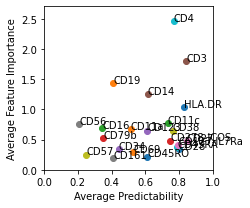

In [15]:
plt.figure(figsize = (3.5,3))
y_coords = abs_avg(model4.coef_)
for i in range(len(common_adt)):
    #plt.scatter(spearmanr(adt[common_adt[i]], ctp[common_adt[i]])[0], np.log(abs(model3.coef_[0][-len(common_adt):][i])))
    plt.scatter((spearmanr(adt[common_adt[i]], ctp[common_adt[i]])[0] + spearmanr(adt[common_adt[i]], azi[common_adt[i]])[0])/2, y_coords[i], label = common_adt[i])
    #plt.text(spearmanr(adt[common_adt[i]], ctp[common_adt[i]])[0], np.log(abs(model3.coef_[0][-len(common_adt):][i])), s = common_adt[i])
    plt.text((spearmanr(adt[common_adt[i]], ctp[common_adt[i]])[0] + spearmanr(adt[common_adt[i]], azi[common_adt[i]])[0])/2, y_coords[i], s = common_adt[i])
    print((spearmanr(adt[common_adt[i]], ctp[common_adt[i]])[0] + spearmanr(adt[common_adt[i]], azi[common_adt[i]])[0])/2, y_coords[i])
plt.xlabel("Average Predictability")
plt.ylabel("Average Feature Importance")
plt.xlim(0,1)
plt.ylim(0, max(y_coords)*1.1)
#plt.legend(loc = "upper left", bbox_to_anchor = (1.01,1.0))
plt.tight_layout()
plt.show()

In [21]:
plt.figure(figsize = (3.5,3))
for i in range(len(common_adt)):
    #plt.scatter(spearmanr(adt[common_adt[i]], azi[common_adt[i]])[0], np.log(abs(model2.coef_[0][-len(common_adt):][i])))
    #plt.text(spearmanr(adt[common_adt[i]], azi[common_adt[i]])[0], np.log(abs(model2.coef_[0][-len(common_adt):][i])), s = common_adt[i])
    plt.scatter(spearmanr(adt[common_adt[i]], azi[common_adt[i]])[0], (abs(model2.coef_[0][-len(common_adt):][i])))
    plt.text(spearmanr(adt[common_adt[i]], azi[common_adt[i]])[0], (abs(model2.coef_[0][-len(common_adt):][i])), s = common_adt[i])
plt.xlabel("Predictability")
plt.ylabel("Coefficient")

NameError: name 'model2' is not defined

<Figure size 252x216 with 0 Axes>

Text(0, 0.5, 'Coefficient')

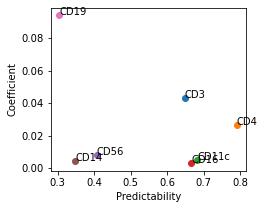

In [103]:
plt.figure(figsize = (3.5,3))
for i in range(len(common_adt)):
    #plt.scatter(spearmanr(adt[common_adt[i]], ctp[common_adt[i]])[0], np.log(abs(model3.coef_[0][-len(common_adt):][i])))
    plt.scatter(spearmanr(adt[common_adt[i]], ctp[common_adt[i]])[0], (abs(model3.coef_[0][-len(common_adt):][i])))
    #plt.text(spearmanr(adt[common_adt[i]], ctp[common_adt[i]])[0], np.log(abs(model3.coef_[0][-len(common_adt):][i])), s = common_adt[i])
    plt.text(spearmanr(adt[common_adt[i]], ctp[common_adt[i]])[0], (abs(model3.coef_[0][-len(common_adt):][i])), s = common_adt[i])
plt.xlabel("Predictability")
plt.ylabel("log(Coefficient)")
plt.ylabel("Coefficient")

## Fine Labels

In [37]:
yfine_train, yfine_test = train_test_split(cell_fine_labels, test_size = 0.2, random_state = random_seed)
perf = []

In [38]:
from time import time
t1 = time()
model1 = LogisticRegression(max_iter = 1000).fit(X1_train, yfine_train)
y1_pred = model1.predict(X1_test)
print(time() - t1)

/home/burhan/.conda/envs/clone/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: 

In [134]:
print("Accuracy: ", accuracy_score(yfine_test, y1_pred))
print("F1score (micro): ", f1_score(yfine_test, y1_pred, average = "micro"))
print("F1score (macro): ", f1_score(yfine_test, y1_pred, average = "macro"))
print("MCC: ", matthews_corrcoef(yfine_test, y1_pred))
perf.append([accuracy_score(yfine_test, y1_pred), f1_score(yfine_test, y1_pred, average = "micro") , f1_score(yfine_test, y1_pred, average = "macro"), matthews_corrcoef(yfine_test, y1_pred)])

Accuracy:  0.8763636363636363
F1score (micro):  0.8763636363636363
F1score (macro):  0.6285283427354638
MCC:  0.8371459744747187


In [135]:
t2 = time()
model2 = LogisticRegression(max_iter = 1500).fit(X2_train, yfine_train)
y2_pred = model2.predict(X2_test)
print(time()-t2)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.1894655227661133


In [136]:
print("Accuracy: ", accuracy_score(yfine_test, y2_pred))
print("F1score (micro): ", f1_score(yfine_test, y2_pred, average = "micro"))
print("F1score (macro): ", f1_score(yfine_test, y2_pred, average = "macro"))
print("MCC: ", matthews_corrcoef(yfine_test, y2_pred))
perf.append([accuracy_score(yfine_test, y2_pred), f1_score(yfine_test, y2_pred, average = "micro") , f1_score(yfine_test, y2_pred, average = "macro"), matthews_corrcoef(yfine_test, y2_pred)])

Accuracy:  0.8872727272727273
F1score (micro):  0.8872727272727273
F1score (macro):  0.6347370638043786
MCC:  0.8515479090137336


In [137]:
model3 = LogisticRegression(max_iter = 1000).fit(X3_train, yfine_train)
y3_pred = model3.predict(X3_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [138]:
print("Accuracy: ", accuracy_score(yfine_test, y3_pred))
print("F1score (micro): ", f1_score(yfine_test, y3_pred, average = "micro"))
print("F1score (macro): ", f1_score(yfine_test, y3_pred, average = "macro"))
print("MCC: ", matthews_corrcoef(yfine_test, y3_pred))
perf.append([accuracy_score(yfine_test, y3_pred), f1_score(yfine_test, y3_pred, average = "micro") , f1_score(yfine_test, y3_pred, average = "macro"), matthews_corrcoef(yfine_test, y3_pred)])

Accuracy:  0.8872727272727273
F1score (micro):  0.8872727272727273
F1score (macro):  0.6348864327790488
MCC:  0.851703933404775


In [38]:
model25 = LogisticRegression(max_iter = 1500).fit(X25_train, yfine_train)
y25_pred = model25.predict(X25_test)

/home/burhan/.conda/envs/clone/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/burhan/.conda/envs/clone/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
print("Accuracy: ", accuracy_score(yfine_test, y25_pred))
print("F1score (micro): ", f1_score(yfine_test, y25_pred, average = "micro"))
print("F1score (macro): ", f1_score(yfine_test, y25_pred, average = "macro"))
print("MCC: ", matthews_corrcoef(yfine_test, y25_pred))
perf.append([accuracy_score(yfine_test, y25_pred), f1_score(yfine_test, y25_pred, average = "micro") , f1_score(yfine_test, y25_pred, average = "macro"), matthews_corrcoef(yfine_test, y25_pred)])

Accuracy:  0.7570674486803519
F1score (micro):  0.7570674486803519
F1score (macro):  0.6428736115080884
MCC:  0.7004101976061441


In [40]:
model35 = LogisticRegression(max_iter = 1000).fit(X35_train, yfine_train)
y35_pred = model35.predict(X35_test)

/home/burhan/.conda/envs/clone/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/burhan/.conda/envs/clone/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
print("Accuracy: ", accuracy_score(yfine_test, y35_pred))
print("F1score (micro): ", f1_score(yfine_test, y35_pred, average = "micro"))
print("F1score (macro): ", f1_score(yfine_test, y35_pred, average = "macro"))
print("MCC: ", matthews_corrcoef(yfine_test, y35_pred))
perf.append([accuracy_score(yfine_test, y35_pred), f1_score(yfine_test, y35_pred, average = "micro") , f1_score(yfine_test, y35_pred, average = "macro"), matthews_corrcoef(yfine_test, y35_pred)])

Accuracy:  0.7514369501466276
F1score (micro):  0.7514369501466275
F1score (macro):  0.6376228965627782
MCC:  0.6934297594170273


In [21]:
model4 = LogisticRegression(max_iter = 1000).fit(X4_train, yfine_train)
y4_pred = model4.predict(X4_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [22]:
print("Accuracy: ", accuracy_score(yfine_test, y4_pred))
print("F1score (micro): ", f1_score(yfine_test, y4_pred, average = "micro"))
print("F1score (macro): ", f1_score(yfine_test, y4_pred, average = "macro"))
print("MCC: ", matthews_corrcoef(yfine_test, y4_pred))
perf.append([accuracy_score(yfine_test, y4_pred), f1_score(yfine_test, y4_pred, average = "micro") , f1_score(yfine_test, y4_pred, average = "macro"), matthews_corrcoef(yfine_test, y4_pred)])

Accuracy:  0.8175160663577941
F1score (micro):  0.8175160663577941
F1score (macro):  0.7152816516641861
MCC:  0.7903326762479065


In [42]:
np.savetxt("temp_fine_labels3-1.csv", np.array(perf).transpose(), delimiter = ",")

0.7993307721399083 0.2260944441597307
0.5133793767994326 0.3613076413460142
0.7353736408573432 0.28767667261762025
0.7501001479412296 0.31111500195234176
0.6128524790714747 0.30627580875740834
0.8440302893742417 0.9089335903455603
0.8475973725638919 0.6710698279727165
0.40891153623719 0.2403793082841627
0.2509373106367122 0.1370180127444624
0.7899727484718426 1.343163809222367
0.6129848162264746 0.9867250013818147
0.410661938468113 0.6151358929234562
0.3447691745470824 0.5426684016282676
0.3494907337820048 0.1667178610461261
0.4435653369756061 0.2134662687557293
0.6156484097055874 0.6054054831794055
0.7962694182143697 0.494825419650116
0.20760738649155128 0.3614465559440491
0.7627244416363104 0.370634795219726
0.7685319052485292 1.4401504439379138
0.829811876562635 0.3533796350828599
0.5288981671110008 0.2268918102717352


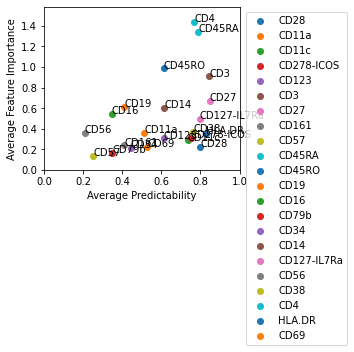

In [23]:
plt.figure(figsize = (3.5,3))
y_coords = abs_avg(model4.coef_)
for i in range(len(common_adt)):
    #plt.scatter(spearmanr(adt[common_adt[i]], ctp[common_adt[i]])[0], np.log(abs(model3.coef_[0][-len(common_adt):][i])))
    plt.scatter((spearmanr(adt[common_adt[i]], ctp[common_adt[i]])[0] + spearmanr(adt[common_adt[i]], azi[common_adt[i]])[0])/2, y_coords[i], label = common_adt[i])
    #plt.text(spearmanr(adt[common_adt[i]], ctp[common_adt[i]])[0], np.log(abs(model3.coef_[0][-len(common_adt):][i])), s = common_adt[i])
    plt.text((spearmanr(adt[common_adt[i]], ctp[common_adt[i]])[0] + spearmanr(adt[common_adt[i]], azi[common_adt[i]])[0])/2, y_coords[i], s = common_adt[i])
    print((spearmanr(adt[common_adt[i]], ctp[common_adt[i]])[0] + spearmanr(adt[common_adt[i]], azi[common_adt[i]])[0])/2, y_coords[i])
plt.xlabel("Average Predictability")
plt.ylabel("Average Feature Importance")
plt.xlim(0,1)
plt.ylim(0, max(y_coords)*1.1)
plt.legend(loc = "upper left", bbox_to_anchor = (1.01,1.0))
#plt.tight_layout()
plt.show()

Text(0, 0.5, 'Coefficient')

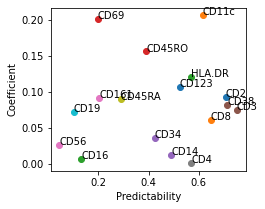

In [44]:
plt.figure(figsize = (3.5,3))
for i in range(len(common_adt)):
    #plt.scatter(spearmanr(adt[common_adt[i]], azi[common_adt[i]])[0], np.log(abs(model2.coef_[0][-len(common_adt):][i])))
    #plt.text(spearmanr(adt[common_adt[i]], azi[common_adt[i]])[0], np.log(abs(model2.coef_[0][-len(common_adt):][i])), s = common_adt[i])
    plt.scatter(spearmanr(adt[common_adt[i]], azi[common_adt[i]])[0], (abs(model2.coef_[0][-len(common_adt):][i])))
    plt.text(spearmanr(adt[common_adt[i]], azi[common_adt[i]])[0], (abs(model2.coef_[0][-len(common_adt):][i])), s = common_adt[i])
plt.xlabel("Predictability")
plt.ylabel("Coefficient")

Text(0, 0.5, 'Coefficient')

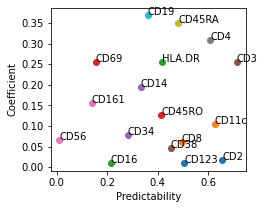

In [45]:
plt.figure(figsize = (3.5,3))
for i in range(len(common_adt)):
    #plt.scatter(spearmanr(adt[common_adt[i]], ctp[common_adt[i]])[0], np.log(abs(model3.coef_[0][-len(common_adt):][i])))
    plt.scatter(spearmanr(adt[common_adt[i]], ctp[common_adt[i]])[0], (abs(model3.coef_[0][-len(common_adt):][i])))
    #plt.text(spearmanr(adt[common_adt[i]], ctp[common_adt[i]])[0], np.log(abs(model3.coef_[0][-len(common_adt):][i])), s = common_adt[i])
    plt.text(spearmanr(adt[common_adt[i]], ctp[common_adt[i]])[0], (abs(model3.coef_[0][-len(common_adt):][i])), s = common_adt[i])
plt.xlabel("Predictability")
plt.ylabel("Coefficient")